<h1 style='color:red'> Clustering - Unsupervised Learning - KMode

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.


In [71]:
#pip install kmodes

**Attribute Information(Categorical):**

- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')
- contact: contact communication type (categorical: 'cellular','telephone') 
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
- UCI Repository: <https://archive.ics.uci.edu/ml/datasets/bank+marketing>

In [72]:
from kmodes.kmodes import KModes

In [73]:
bank = pd.read_csv('bankmarketing.csv')

In [74]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [75]:
bank.shape

(41188, 21)

In [76]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [77]:
bank_cust = bank[['age','job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']]
bank_cust.shape

(41188, 11)

In [78]:
bank_cust['age_bin'] = pd.cut(bank_cust['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])

In [79]:
bank_cust  = bank_cust.drop('age',axis = 1)
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60


In [80]:
bank_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   job          41188 non-null  object  
 1   marital      41188 non-null  object  
 2   education    41188 non-null  object  
 3   default      41188 non-null  object  
 4   housing      41188 non-null  object  
 5   loan         41188 non-null  object  
 6   contact      41188 non-null  object  
 7   month        41188 non-null  object  
 8   day_of_week  41188 non-null  object  
 9   poutcome     41188 non-null  object  
 10  age_bin      41188 non-null  category
dtypes: category(1), object(10)
memory usage: 3.2+ MB


In [81]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bank_cust = bank_cust.apply(le.fit_transform)
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,3,1,0,0,0,0,1,6,1,1,4
1,7,1,3,1,0,0,1,6,1,1,4
2,7,1,3,0,2,0,1,6,1,1,2
3,0,1,1,0,0,0,1,6,1,1,2
4,7,1,3,0,0,2,1,6,1,1,4


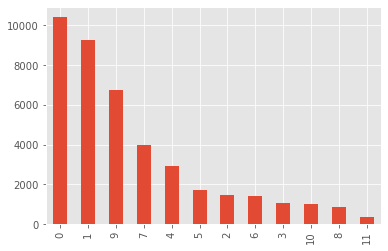

In [82]:
bank_cust['job'].value_counts().plot.bar()

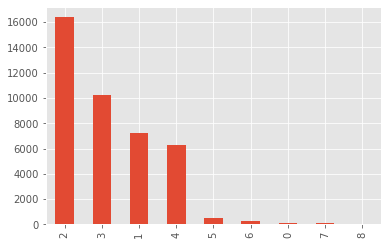

In [83]:
bank_cust['age_bin'].value_counts().plot.bar()

In [84]:
# KModes
km_cao = KModes (n_clusters=2, init = 'Cao', n_init =10, verbose=1)
fit_clusters_cao = km_cao.fit_predict(bank_cust) 

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0


In [85]:
fit_clusters_cao

array([1, 1, 0, ..., 0, 1, 0], dtype=uint16)

In [86]:
# KModes
km_cao = KModes (n_clusters=2, init = 'Cao', n_init =10, verbose=1)
fit_clusters_cao_1 = km_cao.fit(bank_cust) 

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0


In [87]:
fit_clusters_cao_1

KModes(n_clusters=2, verbose=1)

In [88]:
fit_clusters_cao_1.predict(bank_cust)

array([1, 1, 0, ..., 0, 1, 0], dtype=uint16)

In [89]:
cao_cluster_df = pd.DataFrame(km_cao.cluster_centroids_)
cao_cluster_df.columns = bank_cust.columns
cao_cluster_df

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,0,1,6,0,2,0,0,6,2,1,2
1,1,1,3,0,0,0,1,6,0,1,3


In [90]:
# KModes
km_huang = KModes (n_clusters=2, init = 'Huang', n_init =1, verbose=1)
fit_clusters_huang = km_huang.fit_predict(bank_cust) 

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6861, cost: 192364.0
Run 1, iteration: 2/100, moves: 4813, cost: 192364.0


In [91]:
huang_cluster_df = pd.DataFrame(km_huang.cluster_centroids_)
huang_cluster_df.columns = bank_cust.columns
huang_cluster_df

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,0,1,6,0,2,0,0,6,2,1,2
1,1,1,3,0,0,0,1,6,4,1,2


In [92]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=0)
    kmode.fit_predict(bank_cust)
    cost.append(kmode.cost_)

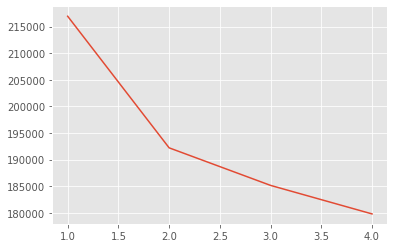

In [93]:
plt.plot(np.array([i for i in range(1,5,1)]),cost)

In [94]:
# Zi varaibles
bank_cust['ClusterPredictedCao'] = fit_clusters_cao
bank_cust['ClusterPredictedHuang'] = fit_clusters_huang
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin,ClusterPredictedCao,ClusterPredictedHuang
0,3,1,0,0,0,0,1,6,1,1,4,1,1
1,7,1,3,1,0,0,1,6,1,1,4,1,1
2,7,1,3,0,2,0,1,6,1,1,2,0,1
3,0,1,1,0,0,0,1,6,1,1,2,0,1
4,7,1,3,0,0,2,1,6,1,1,4,1,1


In [95]:
cust0 = bank_cust[bank_cust.ClusterPredictedCao == 0]
cust1 = bank_cust[bank_cust.ClusterPredictedCao == 1]
print (bank_cust.shape, cust0.shape, cust1.shape)

(41188, 13) (28293, 13) (12895, 13)


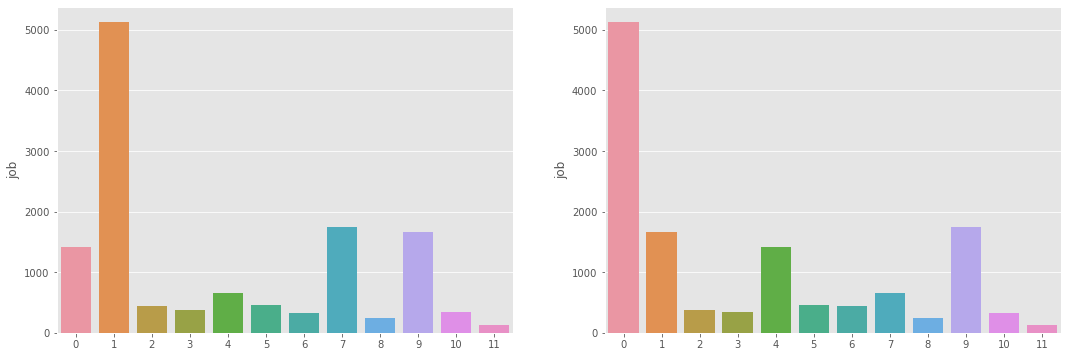

In [96]:
# Jobs Plot

job1_df = pd.DataFrame(cust1['job'].value_counts())
job0_df = pd.DataFrame(cust0['job'].value_counts())

plt.style.use('ggplot')
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.barplot(x=job1_df.index, y=job1_df['job'])

plt.subplot(1,2,2)
sns.barplot(x=job0_df.index, y=job1_df['job'])

plt.show()

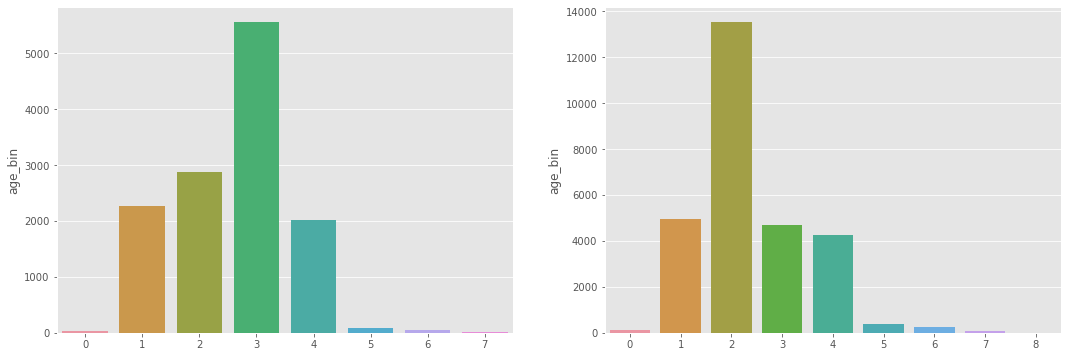

In [97]:
# Age Plot

age1_df = pd.DataFrame(cust1['age_bin'].value_counts())
age0_df = pd.DataFrame(cust0['age_bin'].value_counts())

plt.style.use('ggplot')
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.barplot(x=age1_df.index, y=age1_df['age_bin'])

plt.subplot(1,2,2)
sns.barplot(x=age0_df.index, y=age0_df['age_bin'])

plt.show()

## Bank Marketing - KPrototypes

In [113]:
bank1 = pd.read_csv('bankmarketing.csv')

In [114]:
bank_cust1 = bank1[['job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome','age','duration','euribor3m']]
bank_cust1.shape

(41188, 13)

In [115]:
bank_cust1.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,euribor3m
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,56,261,4.857
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,57,149,4.857
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,37,226,4.857
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,40,151,4.857
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,56,307,4.857


In [116]:
# Categorical columns
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df1 = bank_cust1[['job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']]
df1 = df1.apply(le.fit_transform)
df1.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,3,1,0,0,0,0,1,6,1,1
1,7,1,3,1,0,0,1,6,1,1
2,7,1,3,0,2,0,1,6,1,1
3,0,1,1,0,0,0,1,6,1,1
4,7,1,3,0,0,2,1,6,1,1


In [117]:
# Numeric Columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2 = bank_cust1[['age','duration','euribor3m']]
df2 = scaler.fit_transform(df2)
df2 = pd.DataFrame(df2)
df2.columns = ['age','duration','euribor3m']
df2.head()

,age,duration,euribor3m
0,1.533034,0.010471,0.71246
1,1.628993,-0.421501,0.71246
2,-0.290186,-0.124520,0.71246
3,-0.002309,-0.413787,0.71246
4,1.533034,0.187888,0.71246


In [118]:
# Concatenate
bank_cust2 = pd.concat([df1, df2], axis=1)
bank_cust2.shape

(41188, 13)

In [119]:
bank_cust2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   job          41188 non-null  int32  
 1   marital      41188 non-null  int32  
 2   education    41188 non-null  int32  
 3   default      41188 non-null  int32  
 4   housing      41188 non-null  int32  
 5   loan         41188 non-null  int32  
 6   contact      41188 non-null  int32  
 7   month        41188 non-null  int32  
 8   day_of_week  41188 non-null  int32  
 9   poutcome     41188 non-null  int32  
 10  age          41188 non-null  float64
 11  duration     41188 non-null  float64
 12  euribor3m    41188 non-null  float64
dtypes: float64(3), int32(10)
memory usage: 2.5 MB


In [120]:
bank_cust2.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,euribor3m
0,3,1,0,0,0,0,1,6,1,1,1.533034,0.010471,0.71246
1,7,1,3,1,0,0,1,6,1,1,1.628993,-0.421501,0.71246
2,7,1,3,0,2,0,1,6,1,1,-0.290186,-0.124520,0.71246
3,0,1,1,0,0,0,1,6,1,1,-0.002309,-0.413787,0.71246
4,7,1,3,0,0,2,1,6,1,1,1.533034,0.187888,0.71246


In [121]:
bank_cust_scaled_matrix = bank_cust2.values
print (bank_cust_scaled_matrix.shape,bank_cust2.shape, bank_cust1.shape )

(41188, 13) (41188, 13) (41188, 13)


In [122]:
# KPrototype
kp_bank = KPrototypes (n_clusters=5, init='Cao', verbose=0)
kp_bank.fit_predict(bank_cust_scaled_matrix,categorical=list(range(0,10)))

array([2, 2, 0, ..., 1, 4, 1], dtype=uint16)

In [123]:
kp_bank.cost_

129005.6697866719